# Homework 2

## Problem 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dtype1 = np.dtype([('Date', 'i8'), ('google_stock', 'f4')])
google = np.loadtxt('./hw_2_data/google_data.txt', dtype = dtype1, skiprows = 1)

In [5]:
google

array([(55463, 527.2899780273438), (55462, 513.47998046875),
       (55461, 516.0), ..., (53240, 109.4000015258789),
       (53237, 108.30999755859375), (53236, 100.33999633789062)], 
      dtype=[('Date', '<i8'), ('google_stock', '<f4')])

In [6]:
dtype2 = np.dtype([('Date', 'i8'), ('yahoo_stock', 'f4')])
yahoo = np.loadtxt('./hw_2_data/yahoo_data.txt', dtype = dtype2, skiprows = 1)

In [7]:
dtype3 = np.dtype([('Date', 'i8'), ('temp', 'i2')])
ny = np.loadtxt('./hw_2_data/ny_temps.txt', dtype = dtype3, skiprows = 1)

In [8]:
ny

array([(48988, 53), (49019, 38), (49047, 31), (49078, 66), (49108, 75),
       (49139, 65), (49169, 79), (49200, 82), (49231, 83), (49261, 51),
       (49292, 42), (49322, 45), (49353, 27), (49384, 23), (49412, 28),
       (49443, 54), (49473, 74), (49504, 80), (49534, 80), (49565, 79),
       (49596, 71), (49626, 61), (49657, 69), (49687, 48), (49718, 38),
       (49749, 40), (49777, 36), (49808, 52), (49838, 54), (49869, 83),
       (49899, 81), (49930, 90), (49961, 87), (49991, 66), (50022, 50),
       (50052, 35), (50083, 40), (50114, 22), (50143, 30), (50174, 61),
       (50204, 58), (50235, 75), (50265, 64), (50296, 65), (50327, 81),
       (50357, 67), (50388, 59), (50418, 53), (50449, 27), (50480, 44),
       (50508, 62), (50539, 42), (50569, 74), (50600, 74), (50630, 85),
       (50661, 87), (50692, 81), (50722, 69), (50753, 64), (50783, 48),
       (50814, 24), (50845, 41), (50873, 57), (50904, 86), (50934, 70),
       (50965, 82), (50995, 79), (51026, 79), (51057, 81), (5108

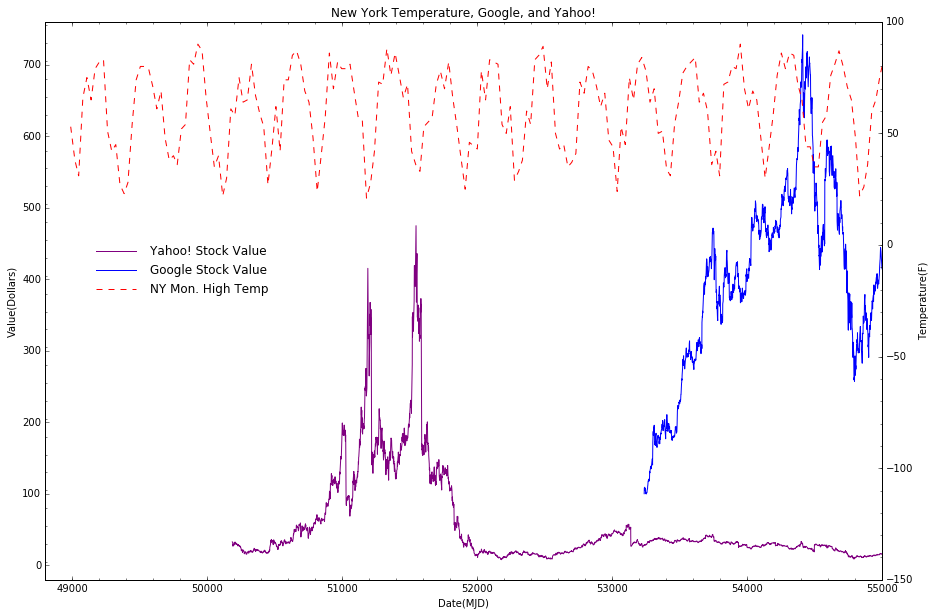

In [13]:

fig, ax1 = plt.subplots(figsize=(15,10))
ax1.plot(yahoo['Date'], yahoo['yahoo_stock'],'purple', label = 'Yahoo! Stock Value')
ax1.plot(google['Date'], google['google_stock'],label = 'Google Stock Value')
ax1.set_xlabel('Date(MJD)')
ax1.set_ylabel('Value(Dollars)')

ax1.set_xlim(48800,55000)
ax1.set_ylim(-20,760)
x,y = ax1.get_ylim()
ax1.set_yticks(np.arange(x,y,25), minor = True)


ax2 = ax1.twinx()

ax2.plot(ny['Date'],ny['temp'], 'r--', label = 'NY Mon. High Temp')
ax2.set_ylabel('Temperature(F)')
ax2.set_ylim(-150,100)
ax2.set_xlim(48800,55000)

x,y = ax2.get_ylim()
ax2.set_yticks(np.arange(x,y,10), minor = True)

x,y = ax2.get_xlim()
ax2.set_xticks(np.arange(x,y,200), minor = True)


handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles = handles1+handles2, labels = labels1+labels2, loc = (0.05, 0.5),  framealpha = 0, handlelength = 4)
ax1.set_title('New York Temperature, Google, and Yahoo!' )

# Problem 3

In [2]:
%matplotlib notebook
import numpy as np

import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.patches as mpatches


In [10]:
dtype4 = [('sepal height','f2'),('sepal width','f2'),('petal length','f2'),
         ('petal width','f2'),('species','S10')]
flower = np.loadtxt('./hw_2_data/flowers.csv', delimiter = ',',
                    dtype = dtype4, skiprows = 1)

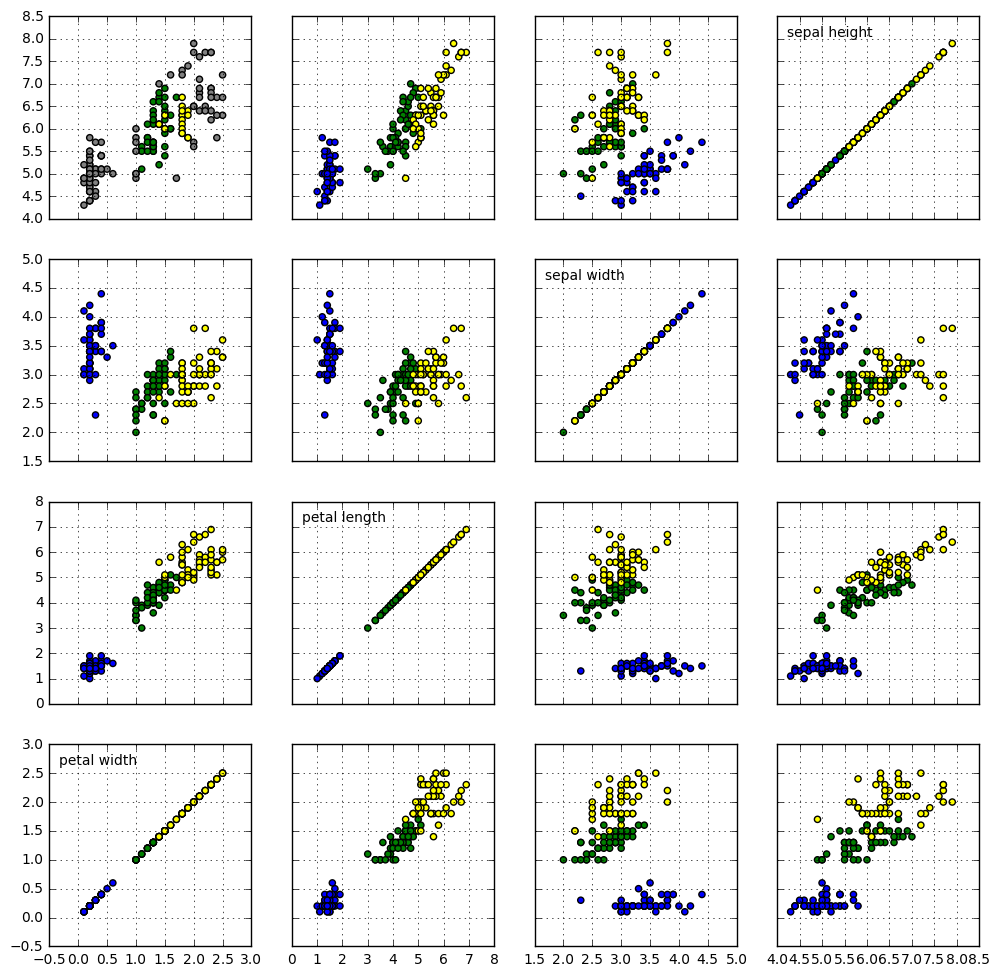

In [11]:
%matplotlib inline
def color(n):
    if n == 6:
        return 'blue'
    elif n == 9:
        return 'yellow'
    else:
        return 'green'

fig, ax = plt.subplots(4,4, figsize=(12,12))

names = ['sepal height','sepal width','petal length','petal width']
scatter = []
for i in np.arange(4):
    for j in np.arange(4):
        axis = ax[i,j]
        scatter += [axis.scatter(flower[names[3-j]],flower[names[i]], c = [color(len(s)) for s in flower['species']])]
        axis.grid()
        if j > 0: 
            axis.set_yticklabels([])
            
        if i <3 :
            axis.set_xticklabels([])
        if i+j ==3:
            xlims = axis.get_xlim()
            ylims = axis.get_ylim()
            axis.text((19 * xlims[0]+ xlims[1])/20, (9 * ylims[1]+ ylims[0])/10,names[i])
np.where(ax == axis)[1][0]

i = np.where(ax == axis)[0][0]
j = np.where(ax == axis)[1][0]

picked = ((flower[names[3-j]] > 5) &
        (flower[names[3-j]] < 7) &
        (flower[names[i]] > 1) &
        (flower[names[i]] < 2))
test= np.array([color(len(s)) for s in flower['species']].copy())             
test[~picked] = 'gray'
test
scatter[0].remove()
scatter = scatter[1:]
axis = ax[0,0]
scatter += [axis.scatter(flower[names[3-0]],flower[names[0]], c = test)]


In [12]:
def color(n):
    if n == 6:
        return 'blue'
    elif n == 9:
        return 'yellow'
    else:
        return 'green'

<IPython.core.display.Javascript object>


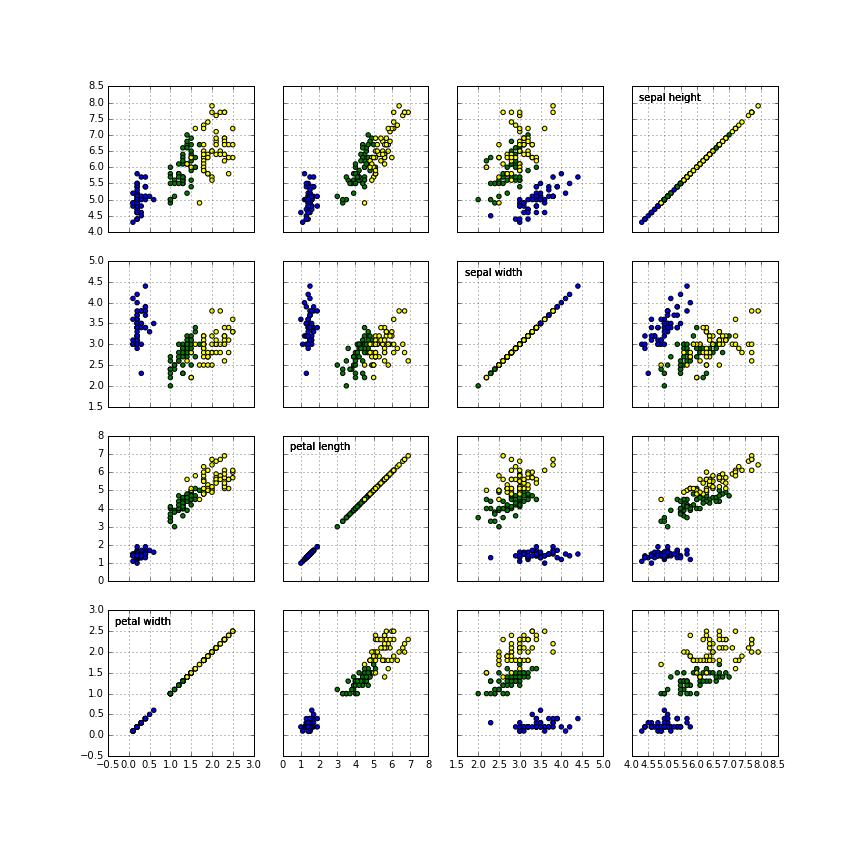

In [25]:
import sys
%matplotlib notebook

class Petal_brusher:
    def __init__(self):
        
        self.original_color = np.array([color(len(s)) for s in flower['species']])
        self.press = None
        self.xpress = None
        self.ypress = None
        self.xrelease = None
        self.yrelease = None
        self.rect = None
        self.ax0 = None
        self.fig, self.ax = plt.subplots(4,4, figsize=(12,12))
        self.color = np.array([color(len(s)) for s in flower['species']])
        self.scatter = []
        self.pairgraph()
        self.connect()
        plt.show()
       
       

    def connect(self):

        self.cidpress = self.fig.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidmotion = self.fig.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)
        self.cidrelease = self.fig.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidkeypress = self.fig.canvas.mpl_connect(
            'key_press_event', self.clear)


    def on_press(self, event):
        if event.inaxes not in self.ax: return
        if self.rect is not None: return
        self.ax0 = event.inaxes
        self.press = True
        self.xpress = event.xdata
        self.ypress = event.ydata

        

    def on_motion(self, event):
  
        if self.press is None: return
        if event.inaxes != self.rect.axes: return
        self.xrelease, self.yrelease = event.xdata, event.ydata



    def on_release(self, event):
        if self.press is None: return
 
        self.press = None
        if event.inaxes == self.ax0:
            self.xrelease, self.yrelease = event.xdata, event.ydata
            
        x_min = min(self.xpress, self.xrelease)
        y_min = min(self.ypress, self.yrelease)
        x_max = max(self.xpress, self.xrelease)
        y_max = max(self.ypress, self.yrelease)
        
        self.rect = mpatches.Rectangle((x_min,y_min), x_max-x_min, y_max-y_min, color = 'k', alpha = 0.1)
        self.ax0.add_patch(self.rect)
        self.update_color(x_min,x_max,y_min,y_max)
        self.pairgraph(True)
        
        sys.stdout.flush()
        self.fig.canvas.draw()

    def disconnect(self):

        self.fig.canvas.mpl_disconnect(self.cidpress)
        self.fig.canvas.mpl_disconnect(self.cidrelease)
        self.fig.canvas.mpl_disconnect(self.cidmotion)
        self.fig.canvas.mpl_disconnect(self.cidkeypress)
        
    def pairgraph(self, update =False):
        
        if update:
            for s in self.scatter:
                s.remove()
                self.scatter = self.scatter[1:]

        names = ['sepal height','sepal width','petal length','petal width']
        for i in np.arange(4):
            for j in np.arange(4):
                axis = self.ax[i,j]
                self.scatter += [axis.scatter(flower[names[3-j]],flower[names[i]], c = self.color)]
                axis.grid()
                if j > 0: 
                    axis.set_yticklabels([])
            
                if i <3 :
                    axis.set_xticklabels([])
                    
                if i+j ==3: # write name of each column
                    xlims = axis.get_xlim()
                    ylims = axis.get_ylim()
                    axis.text((19 * xlims[0]+ xlims[1])/20, (9 * ylims[1]+ ylims[0])/10,names[i])
                    
                    
    def update_color(self, xmin,xmax,ymin,ymax):
        
        i = np.where(self.ax == self.ax0)[0][0]
        j = np.where(self.ax == self.ax0)[1][0]

        picked = ((flower[names[3-j]] > xmin) &
                 (flower[names[3-j]] < xmax) &
                (flower[names[i]] > ymin) &
                (flower[names[i]] < ymax))
                
        self.color[~picked] = '0.85'
        
    def clear(self, event):
        if event.inaxes != self.ax0: return
        if event.key != 'd': return
        
        x_min = min(self.xpress, self.xrelease)
        y_min = min(self.ypress, self.yrelease)
        x_max = max(self.xpress, self.xrelease)
        y_max = max(self.ypress, self.yrelease)
        
        x_loc = event.xdata
        y_loc = event.ydata
        
        if not (x_min<x_loc) & (x_loc < x_max) & (y_loc<y_max) & (y_loc>y_min): return
        self.color = self.original_color.copy()
        self.xpress=None
        self.ypress=None
        self.xrelease= None
        self.yrelease=None
        #self.disconnect()
        self.rect.remove()
        self.rect = None
        self.ax0 = None
        
        self.pairgraph(True)
        
        sys.stdout.flush()
        self.fig.canvas.draw()
        
        
        
        
        

Petal_brusher()

# Question 1 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
dtype5 = [('frac_followed','f4'),('frac_observed','f4'),('frac_observed_uncertainty','f4')]
purity = np.loadtxt('./HW31_example/Purity.txt', skiprows = 2, dtype = dtype5) 
efficiency = np.loadtxt('./HW31_example/Efficiency.txt', skiprows = 2, dtype = dtype5) 

In [10]:
purity[1:6]

array([(0.014925372786819935, 0.4099999964237213, 0.21765509247779846),
       (0.02238805964589119, 0.4866666793823242, 0.19198298454284668),
       (0.02985074557363987, 0.5149999856948853, 0.1805575042963028),
       (0.03731343150138855, 0.5220000147819519, 0.1580052375793457),
       (0.04477611929178238, 0.5350000262260437, 0.13872717320919037)], 
      dtype=[('frac_followed', '<f4'), ('frac_observed', '<f4'), ('frac_observed_uncertainty', '<f4')])

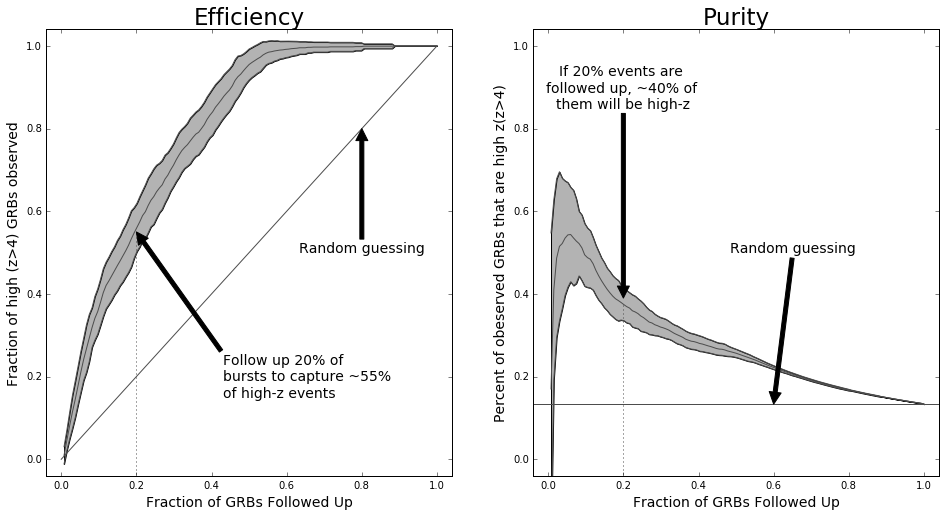

In [82]:
fig,(ax0,ax1) = plt.subplots(1,2, figsize = (16,8))
ax1.plot(purity['frac_followed'], purity['frac_observed'],c = '0.3')
ax1.plot(purity['frac_followed'], purity['frac_observed']+ purity['frac_observed_uncertainty'],c = '0.3')
ax1.plot(purity['frac_followed'], purity['frac_observed']- purity['frac_observed_uncertainty'],c = '0.3')
ax1.fill_between(purity['frac_followed'], purity['frac_observed']-
                 purity['frac_observed_uncertainty'], purity['frac_observed']+ purity['frac_observed_uncertainty'], 
                 facecolor = '0.7')
ax1.axhline(y=(18.0/135.0), c = '0.3')
ax1.axvline(x=0.2, ymin=-0.04, ymax=0.39, linestyle = ':', c = '0.3')


ax1.set_title('Purity', size = 23)
ax1.set_ylabel('Percent of obeserved GRBs that are high z(z>4)',size = 14)
ax1.set_xlabel('Fraction of GRBs Followed Up', size = 14)
ax1.set_xlim(-0.04,1.04)
ax1.set_ylim(-0.04,1.04)

ax1.annotate('If 20% events are \nfollowed up, ~40% of \nthem will be high-z',xy = (0.2,0.39),
            xytext=(0.2,0.85), arrowprops=dict(facecolor='black'), horizontalalignment= 'center', size = 14)

ax1.annotate('Random guessing',xy = (0.6,18.0/135.0),
            xytext=(0.65,0.5), arrowprops=dict(facecolor='black'), horizontalalignment= 'center', size = 14)




ax0.plot(efficiency['frac_followed'], efficiency['frac_observed'],c = '0.3')
ax0.plot(efficiency['frac_followed'], efficiency['frac_observed']+ efficiency['frac_observed_uncertainty'],c = '0.3')
ax0.plot(efficiency['frac_followed'], efficiency['frac_observed']- efficiency['frac_observed_uncertainty'],c = '0.3')
ax0.fill_between(efficiency['frac_followed'], efficiency['frac_observed']-
                 efficiency['frac_observed_uncertainty'], efficiency['frac_observed']+ efficiency['frac_observed_uncertainty'], 
                 facecolor = '0.7')

ax0.axvline(x=0.2, ymin=-0.04, ymax=0.55, linestyle = ':', c = '0.3')


ax0.set_title('Efficiency', size = 23)
ax0.set_ylabel('Fraction of high (z>4) GRBs observed',size = 14)
ax0.set_xlabel('Fraction of GRBs Followed Up', size = 14)
ax0.set_xlim(-0.04,1.04)
ax0.set_ylim(-0.04,1.04)

ax0.annotate('Follow up 20% of \nbursts to capture ~55%\nof high-z events',xy = (0.2,0.55),
            xytext=(0.43,0.2), arrowprops=dict(facecolor='black'), horizontalalignment= 'left',
             verticalalignment= 'center', size = 14)

ax0.annotate('Random guessing',xy = (0.8,0.8),
            xytext=(0.8,0.5), arrowprops=dict(facecolor='black'), horizontalalignment= 'center', size = 14)

ax0.plot((0,1), (0,1), c=".3")